## Import module

In [83]:
import pandas as pd # data processing
import numpy as np # linear algebra
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, classification_report, roc_auc_score, roc_curve
import os
import time 
import seaborn as sns
import lightgbm as lgb
from matplotlib import pyplot as plt
from datasist.structdata import detect_outliers
import copy
from xgboost import XGBClassifier
start = time.time()

C:\Users\MLCF\anaconda3\envs\chamu\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## Data Check

In [73]:
data = pd.read_csv("heart_2020_cleaned.csv",parse_dates=True, dayfirst=False)

In [74]:
outliers_indices = detect_outliers(data, 0, ['BMI'])
len(outliers_indices)

10396

In [75]:
data.drop(index = outliers_indices, inplace=True)

In [76]:
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319789,No,22.22,No,No,No,0.0,0.0,No,Female,18-24,Hispanic,No,Yes,Excellent,8.0,No,No,No
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No


In [77]:
for feature in data.columns: # feature 별 특징 확인
    print(feature)
    print(data[feature].unique(),"\n")

HeartDisease
['No' 'Yes'] 

BMI
[16.6  20.34 26.58 ... 41.23 15.57 40.7 ] 

Smoking
['Yes' 'No'] 

AlcoholDrinking
['No' 'Yes'] 

Stroke
['No' 'Yes'] 

PhysicalHealth
[ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.] 

MentalHealth
[30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24. 28. 16. 12.  6.
 25. 17.  9. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.] 

DiffWalking
['No' 'Yes'] 

Sex
['Female' 'Male'] 

AgeCategory
['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29'] 

Race
['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic'] 

Diabetic
['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)'] 

PhysicalActivity
['Yes' 'No'] 

GenHealth
['Very good' 'Fair' 'Good' 'Poor' 'Excellent'] 

SleepTime
[ 5.  7.  8.  6. 12.  4.  9. 10. 15.  3.  2.  1. 18. 14. 16. 20. 11. 13.
 17. 24. 19. 21. 22. 23.] 

Asthma
['Yes' 'No'] 


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [6]:
No_Value = data.HeartDisease.value_counts()[0]
Yes_Value = data.HeartDisease.value_counts()[1]
print("The number of Yes Value has {}%".format(((Yes_Value/len(data))*100).round(2)))

The number of Yes Value has 8.56%


## Data Preprocessing

### Ordinal Encoder

In [80]:
mapping_Genhealth={'Poor': 0, 'Fair': 1, 'Good': 2, 'Very good': 3, 'Excellent': 4}
mapping_AgeCategory ={'18-24': 0, '25-29': 1, '30-34': 2, '35-39': 3, '40-44': 4, '45-49': 5, '50-54': 6,
 '55-59': 7, '60-64': 8, '65-69': 9, '70-74': 10, '75-79': 11, '80 or older': 12}
mapping_yes_no={'Yes':1,'No':0}
Yes_No_Columns=['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity', 'Asthma',
                'KidneyDisease', 'SkinCancer']

In [81]:
data[Yes_No_Columns]=data[Yes_No_Columns].replace(mapping_yes_no)
data['GenHealth']=data['GenHealth'].map(mapping_Genhealth)
data['AgeCategory']=data['AgeCategory'].map(mapping_AgeCategory)
data['HeartDisease']=data['HeartDisease'].map(mapping_yes_no)

In [82]:
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,7,White,Yes,1,3,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,12,White,No,1,3,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,9,White,Yes,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,11,White,No,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,4,White,No,1,3,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319789,0,22.22,0,0,0,0.0,0.0,0,Female,0,Hispanic,No,1,4,8.0,0,0,0
319790,1,27.41,1,0,0,7.0,0.0,1,Male,8,Hispanic,Yes,0,1,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,Male,3,Hispanic,No,1,3,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,Female,5,Hispanic,No,1,2,6.0,0,0,0


In [27]:
# Define 2 array contain features are categorical type(include Heart Disease feature) and numeric type
cat_features = []
num_features = []
for column, i in zip(data.columns, data.dtypes):
    if i == object:
        cat_features.append(column)
    else:
        num_features.append(column)

In [28]:
df_cat = data[cat_features].copy()

In [29]:
df_cat

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,No,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,Yes,No,Yes
1,No,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,No,No,No
2,No,Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,Yes,No,No
3,No,No,No,No,No,Female,75-79,White,No,No,Good,No,No,Yes
4,No,No,No,No,Yes,Female,40-44,White,No,Yes,Very good,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,Yes,No,No,Yes,Male,60-64,Hispanic,Yes,No,Fair,Yes,No,No
319791,No,Yes,No,No,No,Male,35-39,Hispanic,No,Yes,Very good,Yes,No,No
319792,No,No,No,No,No,Female,45-49,Hispanic,No,Yes,Good,No,No,No
319793,No,No,No,No,No,Female,25-29,Hispanic,No,No,Good,No,No,No


In [30]:
ordinal_encoder = OrdinalEncoder()

In [31]:
data_enc = ordinal_encoder.fit_transform(df_cat)
data_enc = pd.DataFrame(data_enc, columns = cat_features)

In [32]:
for feature in data_enc.columns:
    print(feature)
    print(data_enc[feature].unique(),"\n")

HeartDisease
[0. 1.] 

Smoking
[1. 0.] 

AlcoholDrinking
[0. 1.] 

Stroke
[0. 1.] 

DiffWalking
[0. 1.] 

Sex
[0. 1.] 

AgeCategory
[ 7. 12.  9. 11.  4. 10.  8.  6.  5.  0.  3.  2.  1.] 

Race
[5. 2. 1. 0. 4. 3.] 

Diabetic
[2. 0. 1. 3.] 

PhysicalActivity
[1. 0.] 

GenHealth
[4. 1. 2. 3. 0.] 

Asthma
[1. 0.] 

KidneyDisease
[0. 1.] 

SkinCancer
[1. 0.] 



In [33]:
data_scale = pd.merge(data_enc, data[num_features],left_index=True, right_index=True)
data_scale.shape

(319795, 18)

In [34]:
X = data_scale.loc[:, data_scale.columns != "HeartDisease"].copy()
y = data_scale.loc[:, "HeartDisease"].copy()

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, shuffle=False, random_state=1) # 0.125 x 0.8 = 0.2

In [36]:
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(223856, 17) (31980, 17) (63959, 17) (223856,) (31980,) (63959,)


### Standard Scaler

In [37]:
stand_scale = StandardScaler()

In [38]:
X_train_num = X_train[num_features].copy()
X_val_num = X_val[num_features].copy()
X_test_num = X_test[num_features].copy()
X_train_scaler = stand_scale.fit_transform(X_train_num)
X_val_scaler = stand_scale.transform(X_val_num)
X_test_scaler = stand_scale.transform(X_test_num)

In [39]:
X_train_scaler = pd.DataFrame(X_train_scaler, columns = num_features)
X_val_scaler = pd.DataFrame(X_val_scaler, columns = num_features)
X_test_scaler = pd.DataFrame(X_test_scaler, columns = num_features)

### 변환 적용

In [46]:
X_train = pd.merge(data_enc, X_train_scaler,left_index=True, right_index=True)
X_val = pd.merge(data_enc, X_val_scaler,left_index=True, right_index=True)
X_test = pd.merge(data_enc, X_test_scaler,left_index=True, right_index=True)

In [47]:
# (옵션) modeling 시 필요한 작업 > dataset으로 저장할 땐 실행 X
X_train = X_train.drop('HeartDisease', axis=1)
X_val = X_val.drop('HeartDisease', axis=1)
X_test = X_test.drop('HeartDisease', axis=1)

### (현재 그래프용)Dataset 저장

#### SMOTETomek 적용 전

In [42]:
train = pd.merge(data_enc, X_train_scaler,left_index=True, right_index=True).copy()
val = pd.merge(data_enc, X_val_scaler,left_index=True, right_index=True).copy()
test = pd.merge(data_enc, X_test_scaler,left_index=True, right_index=True).copy()

In [43]:
train

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,BMI,PhysicalHealth,MentalHealth,SleepTime
0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,5.0,2.0,1.0,4.0,1.0,0.0,1.0,-1.845354,-0.040653,3.310368,-1.466971
1,0.0,0.0,0.0,1.0,0.0,0.0,12.0,5.0,0.0,1.0,4.0,0.0,0.0,0.0,-1.254020,-0.420848,-0.487991,-0.075148
2,0.0,1.0,0.0,0.0,0.0,1.0,9.0,5.0,2.0,1.0,1.0,1.0,0.0,0.0,-0.267410,2.113784,3.310368,0.620764
3,0.0,0.0,0.0,0.0,0.0,0.0,11.0,5.0,0.0,0.0,2.0,0.0,0.0,1.0,-0.642133,-0.420848,-0.487991,-0.771059
4,0.0,0.0,0.0,0.0,1.0,0.0,4.0,5.0,0.0,1.0,4.0,0.0,0.0,0.0,-0.721188,3.127637,-0.487991,0.620764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223851,0.0,1.0,0.0,1.0,1.0,0.0,8.0,5.0,2.0,0.0,1.0,1.0,0.0,0.0,0.950041,3.381100,0.778129,-2.162882
223852,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,1.0,4.0,0.0,0.0,0.0,-0.548847,-0.420848,-0.487991,0.620764
223853,0.0,0.0,0.0,0.0,0.0,0.0,8.0,5.0,0.0,1.0,4.0,1.0,0.0,0.0,-0.398642,-0.420848,-0.487991,0.620764
223854,1.0,1.0,0.0,0.0,1.0,1.0,9.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,-0.689566,1.860321,-0.487991,-1.466971


In [44]:
val

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,BMI,PhysicalHealth,MentalHealth,SleepTime
0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,5.0,2.0,1.0,4.0,1.0,0.0,1.0,0.241706,-0.420848,-0.487991,0.620764
1,0.0,0.0,0.0,1.0,0.0,0.0,12.0,5.0,0.0,1.0,4.0,0.0,0.0,0.0,-1.212912,0.086078,-0.487991,-0.075148
2,0.0,1.0,0.0,0.0,0.0,1.0,9.0,5.0,2.0,1.0,1.0,1.0,0.0,0.0,-0.012852,-0.420848,-0.487991,-0.771059
3,0.0,0.0,0.0,0.0,0.0,0.0,11.0,5.0,0.0,0.0,2.0,0.0,0.0,1.0,-0.547266,-0.420848,-0.487991,0.620764
4,0.0,0.0,0.0,0.0,1.0,0.0,4.0,5.0,0.0,1.0,4.0,0.0,0.0,0.0,-0.642133,1.480126,1.411188,-2.162882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31975,0.0,1.0,0.0,0.0,1.0,0.0,10.0,5.0,2.0,0.0,1.0,0.0,1.0,0.0,1.152423,-0.420848,-0.487991,-0.771059
31976,0.0,0.0,0.0,0.0,0.0,1.0,7.0,5.0,0.0,1.0,4.0,0.0,0.0,0.0,0.852012,-0.420848,-0.108155,0.620764
31977,0.0,1.0,0.0,0.0,0.0,0.0,11.0,5.0,0.0,1.0,2.0,0.0,1.0,0.0,-1.152830,-0.420848,-0.487991,0.620764
31978,1.0,0.0,0.0,0.0,0.0,0.0,8.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,-1.023179,-0.420848,-0.487991,-0.771059


In [45]:
# 저장
train.to_csv('train_SMOTE_not.csv', index=False)
val.to_csv('val.csv', index=False)
test.to_csv('test.csv', index=False)

#### SMOTETomek 적용 후

In [61]:
smt = SMOTETomek(random_state=42)

In [62]:
%%time
X_train_SMOTE, y_train_SMOTE = smt.fit_resample(X_train, y_train)

CPU times: total: 1h 7min 11s
Wall time: 24min 34s


In [33]:
X_train_SMOTE

,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,BMI,PhysicalHealth,MentalHealth,SleepTime
0,1.0,0.0,0.0,0.0,0.000000,7.0,5.0,2.0,1.000000,4.0,1.0,0.000000,1.000000,0.212813,-0.423541,-0.238297,-0.068325
1,0.0,0.0,1.0,0.0,0.000000,12.0,5.0,0.0,1.000000,4.0,0.0,0.000000,0.000000,0.722859,-0.045963,-0.112440,-0.068325
2,1.0,0.0,0.0,0.0,1.000000,9.0,5.0,2.0,1.000000,1.0,1.0,0.000000,0.000000,-0.715976,-0.423541,0.768555,0.627220
3,0.0,0.0,0.0,0.0,0.000000,11.0,5.0,0.0,0.000000,2.0,0.0,0.000000,1.000000,-0.281492,-0.423541,-0.490010,-0.763870
4,0.0,0.0,0.0,1.0,0.000000,4.0,5.0,0.0,1.000000,4.0,0.0,0.000000,0.000000,0.066410,0.079896,2.027120,4.800490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398859,0.0,0.0,0.0,0.0,1.000000,2.0,5.0,0.0,1.000000,4.0,0.0,0.000000,0.000000,-0.083675,-0.423541,-0.490010,0.627220
398860,1.0,0.0,0.0,0.0,0.000000,9.0,5.0,2.0,0.054137,2.0,0.0,0.000000,0.945863,1.889372,-0.066404,-0.370967,-0.068325
398861,0.0,0.0,0.0,0.0,0.436584,0.0,5.0,0.0,1.000000,4.0,0.0,0.000000,0.000000,0.833603,3.352234,-0.490010,-0.068325
398862,0.0,0.0,0.0,0.0,0.000000,0.0,3.0,0.0,1.000000,0.0,0.0,0.000000,0.000000,0.705779,-0.423541,-0.490010,-0.068325


In [25]:
y_train_SMOTE

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
398059    1.0
398060    1.0
398061    1.0
398062    1.0
398063    1.0
Name: HeartDisease, Length: 398064, dtype: float64

In [41]:
train_SMOTE = pd.merge(y_train_SMOTE, X_train_SMOTE,left_index=True, right_index=True).copy()

In [42]:
train_SMOTE 

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,BMI,PhysicalHealth,MentalHealth,SleepTime
0,0.0,1.0,0.0,0.0,0.0,0.000000,7.0,5.0,2.0,1.000000,4.0,1.0,0.000000,1.000000,0.212813,-0.423541,-0.238297,-0.068325
1,0.0,0.0,0.0,1.0,0.0,0.000000,12.0,5.0,0.0,1.000000,4.0,0.0,0.000000,0.000000,0.722859,-0.045963,-0.112440,-0.068325
2,0.0,1.0,0.0,0.0,0.0,1.000000,9.0,5.0,2.0,1.000000,1.0,1.0,0.000000,0.000000,-0.715976,-0.423541,0.768555,0.627220
3,0.0,0.0,0.0,0.0,0.0,0.000000,11.0,5.0,0.0,0.000000,2.0,0.0,0.000000,1.000000,-0.281492,-0.423541,-0.490010,-0.763870
4,0.0,0.0,0.0,0.0,1.0,0.000000,4.0,5.0,0.0,1.000000,4.0,0.0,0.000000,0.000000,0.066410,0.079896,2.027120,4.800490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398859,1.0,0.0,0.0,0.0,0.0,1.000000,2.0,5.0,0.0,1.000000,4.0,0.0,0.000000,0.000000,-0.083675,-0.423541,-0.490010,0.627220
398860,1.0,1.0,0.0,0.0,0.0,0.000000,9.0,5.0,2.0,0.054137,2.0,0.0,0.000000,0.945863,1.889372,-0.066404,-0.370967,-0.068325
398861,1.0,0.0,0.0,0.0,0.0,0.436584,0.0,5.0,0.0,1.000000,4.0,0.0,0.000000,0.000000,0.833603,3.352234,-0.490010,-0.068325
398862,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,3.0,0.0,1.000000,0.0,0.0,0.000000,0.000000,0.705779,-0.423541,-0.490010,-0.068325


In [51]:
sns.countplot(x="HeartDisease", data=y_test)

ValueError: Could not interpret input 'HeartDisease'

In [44]:
# 저장
train_SMOTE.to_csv('train_SMOTE.csv', index=False)

### Modeling(Machine Learning)

In [52]:
# modeling 넣기 전 input check
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(223856, 17) (31980, 17) (63959, 17) (223856,) (31980,) (63959,)


In [53]:
test_label_copy = copy.copy(y_test)

In [54]:
np.random.shuffle(test_label_copy)

C:\Users\MLCF\AppData\Local\Temp\ipykernel_39664\3900122629.py:1: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(test_label_copy)


KeyError: 17931

In [92]:
float(np.sum(np.array(y_test==np.array(test_labels_copy))))/len(y_test)

NameError: name 'test_labels_copy' is not defined

In [85]:
# 평가 함수
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
#    f1 = f1_score(y_test, pred, average='micro')
    f1 = f1_score(y_test, pred, average='weighted')
    cr = classification_report(y_test, pred)
    auc = roc_auc_score(y_test, pred)
    fpr, tpr, thres = roc_curve(y_test, pred)
    print('Confusion Matrix')
    print(confusion)
    print('Accuracy:{}, Precision:{}, recall:{}, F1-score:{}'.format(accuracy, precision, recall, f1))
    print(cr)
    print('AUC:{}'.format(auc))
    plot_roc_curve(fpr,tpr)
    plt.show

In [86]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr,tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('FPR')
    plt.ylabel('TPR')

#### Logistic Regression

In [87]:
%%time
from sklearn.linear_model import LogisticRegression

# 모델 생성 및 학습 시키기
logistic = LogisticRegression(random_state=34)
logistic.fit(X_train_SMOTE, y_train_SMOTE)

CPU times: total: 17.1 s
Wall time: 2.36 s


LogisticRegression(random_state=34)

Confusion Matrix
[[20192  8999]
 [ 1809   980]]
Accuracy:0.6620387742338962, Precision:0.09820623308948792, recall:0.35138042309071355, F1-score:0.7334626435214076
              precision    recall  f1-score   support

         0.0       0.92      0.69      0.79     29191
         1.0       0.10      0.35      0.15      2789

    accuracy                           0.66     31980
   macro avg       0.51      0.52      0.47     31980
weighted avg       0.85      0.66      0.73     31980

AUC:0.521550236895636


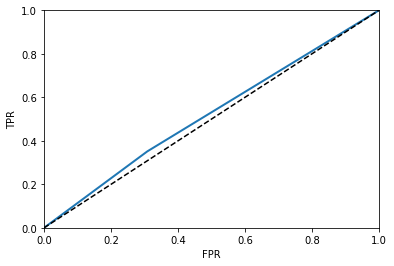

In [88]:
# validation 검증
y_log_pred_val = logistic.predict(X_val)
get_clf_eval(y_val, y_log_pred_val)

In [27]:
# test 검증
y_log_pred_test = logistic.predict(X_test)
get_clf_eval(y_test, y_log_pred_test)

Confusion Matrix
[[46043 12531]
 [ 3140  2245]]
Accuracy:0.7549836614080896, Precision:0.15193557119653492, recall:0.4168987929433612, F1-score:0.8013714430231929
              precision    recall  f1-score   support

         0.0       0.94      0.79      0.85     58574
         1.0       0.15      0.42      0.22      5385

    accuracy                           0.75     63959
   macro avg       0.54      0.60      0.54     63959
weighted avg       0.87      0.75      0.80     63959

AUC:0.6014821413755629


#### RandomForest Classifier

In [28]:
%%time
from sklearn.ensemble import RandomForestClassifier

#모델 훈련
rand_clf = RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=28, random_state=0)
rand_clf.fit(X_train_SMOTE, y_train_SMOTE)

y_pred_train = rand_clf.predict(X_train)
y_pred_val = rand_clf.predict(X_val)

CPU times: total: 8.56 s
Wall time: 8.55 s


Confusion Matrix
[[24890  4352]
 [ 1887   851]]
Accuracy:0.8049093183239525, Precision:0.16355948491255046, recall:0.3108108108108108, F1-score:0.8308965069867686
              precision    recall  f1-score   support

         0.0       0.93      0.85      0.89     29242
         1.0       0.16      0.31      0.21      2738

    accuracy                           0.80     31980
   macro avg       0.55      0.58      0.55     31980
weighted avg       0.86      0.80      0.83     31980

AUC:0.5809918905979367


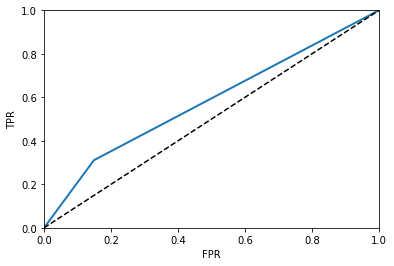

In [83]:
#test set으로 검증
y_randfore_pred_val = rand_clf.predict(X_val)
get_clf_eval(y_val, y_randfore_pred_val)

In [30]:
#test set으로 검증
y_randfore_pred_test = rand_clf.predict(X_test)
get_clf_eval(y_test, y_randfore_pred_test)

Confusion Matrix
[[49808  8766]
 [ 3711  1674]]
Accuracy:0.8049219030941697, Precision:0.16034482758620688, recall:0.3108635097493036, F1-score:0.8316802581740624
              precision    recall  f1-score   support

         0.0       0.93      0.85      0.89     58574
         1.0       0.16      0.31      0.21      5385

    accuracy                           0.80     63959
   macro avg       0.55      0.58      0.55     63959
weighted avg       0.87      0.80      0.83     63959

AUC:0.58060333270782


#### LightBGM

In [58]:
lgb_train = lgb.Dataset(X_train_SMOTE, y_train_SMOTE)
lgb_val = lgb.Dataset(X_val, y_val, reference=lgb_train)

params={
    'num_leaves':50,
    'objective':'binary',
    'max_depth':7,
    'learning_rate':0.22,
    'n_estimators':200
}
num_round=30000

model = lgb.train(params, lgb_train, valid_sets=[lgb_train, lgb_val], num_boost_round=num_round)


C:\Users\MLCF\anaconda3\envs\chamu\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 199032, number of negative: 199032
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011581 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 398064, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[1]	training's binary_logloss: 0.622614	valid_1's binary_logloss: 0.629338
[2]	training's binary_logloss: 0.579061	valid_1's binary_logloss: 0.588548
[3]	training's binary_logloss: 0.550048	valid_1's binary_logloss: 0.561115
[4]	training's binary_logloss: 0.525526	valid_1's binary_logloss: 0.540414
[5]	training's binary_logloss: 0.499985	valid_1's binary_logloss: 0.517789
[6]	training's binary_logloss: 0.483774	valid_1's binary_logloss: 0.503837
[7]	training's binary_logloss: 0.47012	va

[108]	training's binary_logloss: 0.210267	valid_1's binary_logloss: 0.309424
[109]	training's binary_logloss: 0.209917	valid_1's binary_logloss: 0.309335
[110]	training's binary_logloss: 0.209566	valid_1's binary_logloss: 0.309142
[111]	training's binary_logloss: 0.209396	valid_1's binary_logloss: 0.309126
[112]	training's binary_logloss: 0.208915	valid_1's binary_logloss: 0.308954
[113]	training's binary_logloss: 0.208688	valid_1's binary_logloss: 0.308966
[114]	training's binary_logloss: 0.208417	valid_1's binary_logloss: 0.308875
[115]	training's binary_logloss: 0.208205	valid_1's binary_logloss: 0.308823
[116]	training's binary_logloss: 0.207778	valid_1's binary_logloss: 0.308661
[117]	training's binary_logloss: 0.207478	valid_1's binary_logloss: 0.308551
[118]	training's binary_logloss: 0.207191	valid_1's binary_logloss: 0.308555
[119]	training's binary_logloss: 0.20681	valid_1's binary_logloss: 0.308394
[120]	training's binary_logloss: 0.206522	valid_1's binary_logloss: 0.308389


Confusion Matrix
[[58157   417]
 [ 5301    84]]
Accuracy:0.9105989774699417, Precision:0.16766467065868262, recall:0.015598885793871866, F1-score:0.8752970501529886
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     58574
         1.0       0.17      0.02      0.03      5385

    accuracy                           0.91     63959
   macro avg       0.54      0.50      0.49     63959
weighted avg       0.85      0.91      0.88     63959

AUC:0.5042398430744891


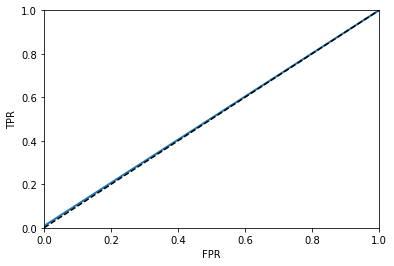

In [85]:
y_lgb_pred_test = model.predict(X_test)
y_lgb_pred_test = (y_lgb_pred_test > 0.5).astype(int)
get_clf_eval(y_test, y_lgb_pred_test)

#### KNN

In [68]:
knn = KNeighborsClassifier()
knn.fit(X_train_SMOTE, y_train_SMOTE)

KNeighborsClassifier()

Confusion Matrix
[[21732  7510]
 [ 1729  1009]]
Accuracy:0.7111006879299562, Precision:0.11844113158821458, recall:0.3685171658144631, F1-score:0.7694376891668072
              precision    recall  f1-score   support

         0.0       0.93      0.74      0.82     29242
         1.0       0.12      0.37      0.18      2738

    accuracy                           0.71     31980
   macro avg       0.52      0.56      0.50     31980
weighted avg       0.86      0.71      0.77     31980

AUC:0.5558473935221007


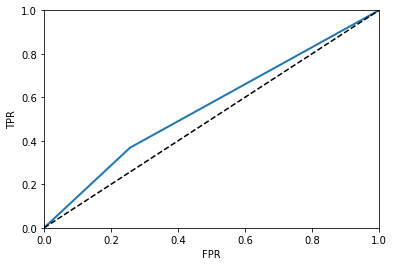

In [84]:
# validation 검증
y_knn_pred_val = knn.predict(X_val)
get_clf_eval(y_val, y_knn_pred_val)